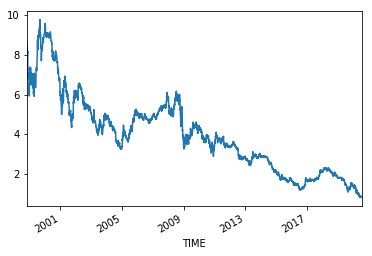

In [4]:
from urllib.request import urlopen
import pandas as pd
from bs4 import BeautifulSoup
import sqlite3
import datetime
import matplotlib.pyplot as plt
import json
 

# 한국은행API 인증코드
key = '5AO6I682B0L73A3FH2DB'
 
# https://ecos.bok.or.kr/jsp/openapi/OpenApiController.jsp?t=guideServiceDtl&apiCode=OA-1040&menuGroup=MENU000004
# 여기서 주소 만들면 쉽다.
url="http://ecos.bok.or.kr/api/StatisticSearch/"+key+"/json/kr/1/10000/060Y001/DD/190001/202008/010200000/?/?/"

result = urlopen(url)
html = result.read()
data = json.loads(html)
# print(data)
data=data["StatisticSearch"]["row"]
Interest_rate = pd.DataFrame(data)
Interest_rate = Interest_rate[Interest_rate["ITEM_CODE1"]=="010200000"]
Interest_rate["DATA_VALUE"]=Interest_rate["DATA_VALUE"].astype("float")
# print(Interest_rate)
 
Interest_rate["TIME"] = Interest_rate["TIME"].astype("str")
Interest_rate["TIME"] = Interest_rate["TIME"].apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d'))
# print(Interest_rate["TIME"])

Interest_rate=Interest_rate.sort_values("TIME")
Interest_rate.set_index("TIME",inplace=True)
# print(Interest_rate)

Interest_rate["DATA_VALUE"].plot()
plt.show()

In [5]:
# xlabel=Interest_rate["TIME"]
# xlabel = xlabel.drop_duplicates()
# plt.scatter(Interest_rate.index,Interest_rate["DATA_VALUE"])
# plt.plot(Interest_rate.index,Interest_rate["DATA_VALUE"])
# plt.xticks(Interest_rate.index, xlabel,rotation=70)
# plt.show()

In [6]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Plotting 
trace = go.Scatter(x=Interest_rate.index, y=Interest_rate["DATA_VALUE"]) 
layout = go.Layout( title='국고채(3년) 금리 추이', 
                    xaxis=dict( 
                            rangeselector=dict( 
                                buttons=list(
                                    [ dict(count=1, label='1m', step='month', stepmode='backward'), 
                                        dict(count=3, label='3m', step='month', stepmode='backward'), 
                                        dict(count=6, label='6m', step='month', stepmode='backward'), 
                                        dict(count=1, label="YTD", step="year", stepmode="todate"),
                                        dict(count=1, label="1y",step="year", stepmode="backward"),
                                        dict(count=2, label="2y",step="year", stepmode="backward"),
                                        dict(count=3, label="3y",step="year", stepmode="backward"),
                                        dict(count=5, label="5y",step="year", stepmode="backward"),
                                        dict(count=7, label="7y",step="year", stepmode="backward"),
                                        dict(count=10, label="10y",step="year", stepmode="backward"),
                                        dict(step='all') ]) 
                                    ), 
                            rangeslider=dict(visible=True), 
                            type='date',
                            title='날짜'
                            ),
                        yaxis=dict(title='수익률'),
                        width=800, height=600
                        )

data1=[trace] 
fig1 = dict(data=data1, layout=layout)
iplot(fig1)